<h1>Predicting Student Final Exam Scores</h1>
We're predicting student final exam scores based on factors such as study hours, attendance, previous GPA, participation score, and sleep hours.

### 1. Import Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import SplineTransformer
import seaborn as sns

# Display plots inline
%matplotlib inline

### 2. Generate the Dataset with Five Features

In [2]:
# Generating a dataset for predicting student final exam scores
np.random.seed(42)

# Features (study hours, attendance %, previous GPA, participation score, sleep hours)
X = np.random.rand(100, 5) * [10, 100, 4, 100, 10]  # Scaling features for realism

# Target (Final Exam Score) = A function of these features with some random noise
y = (20 + 5 * X[:, 0] + 0.3 * X[:, 1] + 10 * X[:, 2] + 0.1 * X[:, 3] - 2 * X[:, 4] + np.random.randn(100) * 5).reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape of X and y
print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)

Feature matrix X shape: (100, 5)
Target vector y shape: (100, 1)


### 3. OLS (Ordinary Least Squares) Regression

OLS is a method for fitting a linear regression model. It estimates the relationship
between a dependent variable (target) and one or more independent variables (features)
by minimizing the sum of squared differences between observed and predicted values.

#### Key Concept:
OLS finds the line (or hyperplane) that best fits the data by minimizing residuals (the differences between actual and predicted values).

#### The regression line equation is:
- y = β0 + β1 * x1 + β2 * x2 + ... + βn * xn + ε </br>

#### where:
- y: predicted value (target) </br>
- x1, x2, ..., xn: independent variables (features) </br>
- β0: intercept (constant term) </br>
- β1, β2, ..., βn: coefficients (weights for each feature) </br>
- ε: error term (difference between observed and predicted values) </br>

#### OLS minimizes the sum of squared errors (SSE):
SSE = Σ (y_actual - y_predicted)^2

#### Assumptions of OLS:
1. Linearity: The relationship between dependent and independent variables is linear.
2. Independence: Residuals are independent of each other.
3. Homoscedasticity: Residuals have constant variance across all levels of the independent variables.
4. No Multicollinearity: Independent variables are not highly correlated with each other.

#### OLS works well when assumptions hold, but can be sensitive to outliers or multicollinearity.


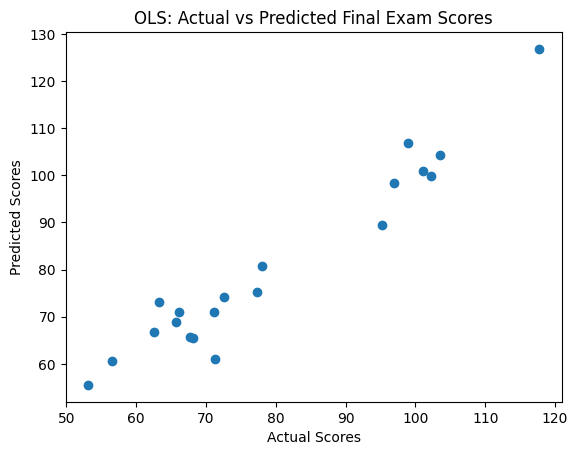

Mean Squared Error (OLS): 24.398455484066623


In [11]:
# OLS regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Predictions using OLS
y_pred_ols = ols_model.predict(X_test)

# Plot OLS predictions
plt.scatter(y_test, y_pred_ols)
plt.title('OLS: Actual vs Predicted Final Exam Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# Mean Squared Error (OLS)
print(f"Mean Squared Error (OLS): {mean_squared_error(y_test, y_pred_ols)}")

### 4. Polynomial Regression

Polynomial Regression is an extension of linear regression that models the relationship between the dependent variable (target) and independent variables (features) as an nth-degree polynomial.

#### Key Concept:
Polynomial regression introduces non-linearity by transforming the original features into polynomial features, allowing the model to capture more complex patterns in the data that a linear model would miss.

#### The regression equation for degree n is:
y = β0 + β1 * x1 + β2 * x1² + ... + βn * x1^n + ε </br>
#### where:
y: predicted value (target) </br>
x1: independent variable (feature) </br>
β0: intercept (constant term) </br>
β1, β2, ..., βn: coefficients for each power of the feature </br>
ε: error term (difference between observed and predicted values) </br>

#### Polynomial regression minimizes the sum of squared errors (SSE):
SSE = Σ (y_actual - y_predicted)^2

#### Polynomial Regression Process:
- Feature transformation: The original features are transformed into polynomial terms (e.g., x², x³).
- Linear fit: A linear regression model is fit on these transformed features, making the regression itself nonlinear in nature.

#### Assumptions of Polynomial Regression:
- Linearity in coefficients: The relationship between the polynomial features and the target is linear with respect to the coefficients.
- Independence: Residuals are independent of each other.
- Homoscedasticity: The variance of residuals is constant across all levels of the independent variables.
- No Multicollinearity: Independent variables, including polynomial terms, are not highly correlated with each other.

Polynomial regression can model complex, non-linear relationships, but it risks overfitting if the degree of the polynomial is too high.

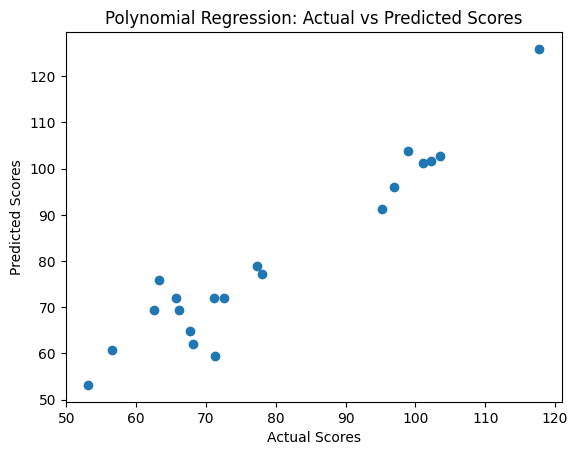

Mean Squared Error (Polynomial): 28.885854822864076


In [12]:
# Polynomial transformation (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predictions using Polynomial Regression
y_pred_poly = poly_model.predict(X_poly_test)

# Plot Polynomial Regression
plt.scatter(y_test, y_pred_poly)
plt.title('Polynomial Regression: Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# Mean Squared Error (Polynomial)
print(f"Mean Squared Error (Polynomial): {mean_squared_error(y_test, y_pred_poly)}")


### 5. Ridge Regression


Ridge Regression is similar to linear regression but it includes a regularization term to prevent overfitting by penalizing large coefficients. It is particularly useful when there is **multicollinearity** (high correlation between independent variables) or when the number of features is large compared to the number of observations.

#### Key Concept:
Ridge regression modifies the OLS objective function by adding an L2 penalty (squared magnitude of coefficients) to the loss function. This encourages the model to keep the coefficients smaller, reducing the risk of overfitting. The degree of regularization is controlled by a hyperparameter, alpha.

#### The Ridge Regression equation:
y = β0 + β1 * x1 + β2 * x2 + ... + βn * xn + ε
#### Regularized loss function:
Minimize: SSE + α * Σ(βi²) </br>
Here, **α** is the regularization strength, and **Σ(βi²)** is the sum of squared coefficients. The larger the value of α, the more the coefficients are penalized.

#### Why Ridge Works:
1. Multicollinearity Handling: Ridge helps to stabilize estimates when independent variables are highly correlated, distributing the influence more evenly across features.
2. Bias-Variance Tradeoff: By introducing bias (via regularization), Ridge reduces variance, which can improve model performance on unseen data (better generalization).
3. Feature Shrinkage: Unlike Lasso, Ridge does not set coefficients to zero, but it shrinks them toward zero, making it useful when all features are potentially important.

#### Limitations:
1. Interpretability: As Ridge shrinks all coefficients but doesn’t eliminate any, the model can become harder to interpret, especially with many features.
2. Tuning α: The strength of the regularization (α) must be carefully tuned. If α is too small, the model behaves like OLS; if too large, it can overshrink coefficients and miss important patterns.

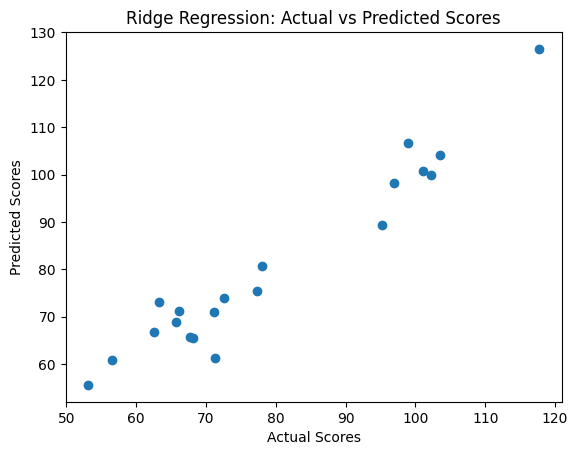

Mean Squared Error (Ridge): 24.040743402968182


In [13]:
# Ridge regression
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

# Predictions using Ridge
y_pred_ridge = ridge_reg.predict(X_test)

# Plot Ridge Regression
plt.scatter(y_test, y_pred_ridge)
plt.title('Ridge Regression: Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# Mean Squared Error (Ridge)
print(f"Mean Squared Error (Ridge): {mean_squared_error(y_test, y_pred_ridge)}")


### 6. Lasso regression


Lasso Regression is another type of linear regression that, like Ridge, adds a regularization term to reduce overfitting. However, instead of using an L2 penalty (sum of squared coefficients), Lasso uses an L1 penalty, which is the sum of the absolute values of the coefficients.

#### Key Concept:
Lasso stands for Least Absolute Shrinkage and Selection Operator. The L1 regularization forces some coefficients to become exactly zero, effectively performing feature selection. This makes Lasso particularly useful when you have many features, and you suspect only a subset are relevant.

#### The Lasso Regression equation:
- Minimize: SSE + α * Σ|βi|

Here, α controls the strength of the penalty. A larger α will drive more coefficients to zero, making the model simpler.

#### Why Lasso is Useful:
- Feature Selection: Lasso can automatically remove irrelevant features by setting their coefficients to zero, which helps improve model interpretability.
- Sparse Solutions: Lasso is ideal when you believe only a few features are important, as it simplifies the model by eliminating unneeded features.
#### When to Use Lasso:
- When you have a large number of features and expect many to be irrelevant.
- When interpretability is important, as Lasso provides a more compact, readable model.

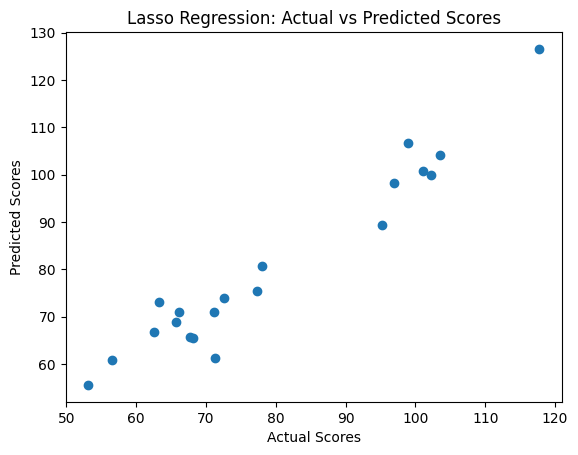

Mean Squared Error (Lasso): 24.085593552964884


In [14]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Predictions using Lasso
y_pred_lasso = lasso_reg.predict(X_test)

# Plot Lasso Regression
plt.scatter(y_test, y_pred_lasso)
plt.title('Lasso Regression: Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# Mean Squared Error (Lasso)
print(f"Mean Squared Error (Lasso): {mean_squared_error(y_test, y_pred_lasso)}")


### 7. ElasticNet regression


It is a hybrid of Ridge and Lasso regression that combines their regularization techniques. It applies both L1 (Lasso) and L2 (Ridge) penalties to the loss function, making it useful when you want the benefits of both methods.

#### Key Concept:
Elastic Net aims to balance the strengths of Ridge and Lasso by applying a linear combination of both regularization terms. It includes two hyperparameters:

1. α: Controls the overall strength of regularization.
2. l1_ratio: Controls the mix between Lasso (L1) and Ridge (L2). When l1_ratio = 1, it behaves like Lasso; when l1_ratio = 0, it behaves like Ridge. Any value between 0 and 1 gives you a combination of the two.

#### The Elastic Net equation:
- Minimize: SSE + α * [(1 - l1_ratio) * Σ(βi²) + l1_ratio * Σ|βi|]

#### Why Elastic Net is Useful:
- Feature Selection and Shrinkage: Like Lasso, Elastic Net can perform feature selection by shrinking some coefficients to zero, but it avoids some of the limitations of pure Lasso, such as instability when features are highly correlated.
- Stability: By including the Ridge (L2) penalty, Elastic Net can better handle multicollinearity (highly correlated features) and spread the effect across multiple variables rather than aggressively zeroing out coefficients.
- Flexibility: The ability to control the balance between Lasso and Ridge gives Elastic Net more flexibility in tuning the model for your specific needs.

#### When to Use Elastic Net:
- When you have many correlated features, and you want to shrink coefficients while selecting important ones.
- When you want more stability than Lasso, but also some feature selection, which Ridge doesn't provide.

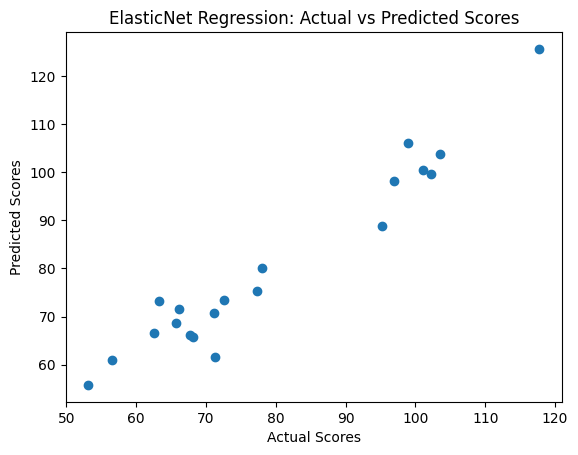

Mean Squared Error (ElasticNet): 23.067205529413634


In [15]:
# ElasticNet regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Predictions using ElasticNet
y_pred_elastic = elastic_net.predict(X_test)

# Plot ElasticNet Regression
plt.scatter(y_test, y_pred_elastic)
plt.title('ElasticNet Regression: Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# Mean Squared Error (ElasticNet)
print(f"Mean Squared Error (ElasticNet): {mean_squared_error(y_test, y_pred_elastic)}")


### 8. Functional Regression

It is a type of regression that allows you to model the relationship between a functional predictor (a variable that varies continuously over a domain, like time) and the target variable. This method is useful when your predictors are not discrete data points, but rather functions, curves, or shapes.

#### Key Concept:
Functional regression models use basis functions to approximate complex relationships. Instead of directly fitting a linear or polynomial regression, functional regression fits a function to each predictor. These functions can then be used to predict the target variable. Some common basis functions include polynomials, splines, or Fourier series.

#### Why Functional Regression is Useful:
- Continuous Data: It's particularly valuable when you're working with continuous data, like time-series, spatial data, or any data that evolves over a continuum.
- Modeling Complex Patterns: It captures complex patterns that would be hard to model using traditional regression. For instance, in time-series data, it allows you to analyze how the shape of the data over time impacts the target variable.
- Flexible Basis Functions: By choosing appropriate basis functions (e.g., splines or Fourier basis), you can model non-linear relationships without manually transforming your data.

#### Example of Functional Regression:
In a spline-based functional regression, you represent your predictor variables using splines (piecewise polynomials), and then fit a regression model using the transformed data. This allows the model to adapt to non-linearities in the data.

#### Application Example:
Functional regression is commonly used in fields like medical research (e.g., analyzing heart rate data over time), economics (e.g., modeling economic trends over decades), or environmental science (e.g., studying temperature changes over time).

#### Why Use Functional Regression:
- When predictors vary continuously: If your input variables are functions rather than discrete values (e.g., curves, shapes, time-series), functional regression is the natural choice.
- When capturing complex, smooth relationships: If traditional regression methods fail to capture important patterns because your data evolves smoothly (e.g., temporal data), functional regression helps fit those curves better.

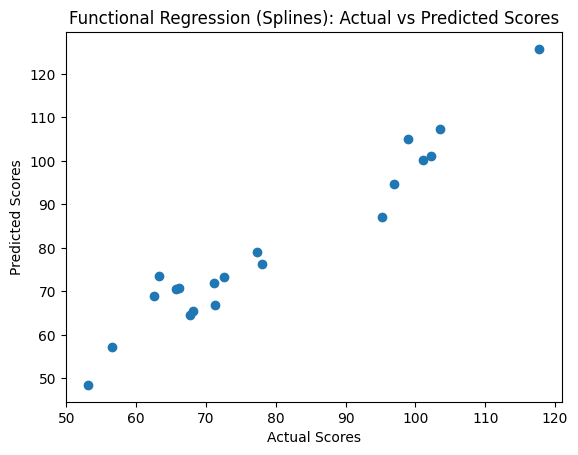

Mean Squared Error (Functional): 22.558406756385175


In [16]:
# Functional Regression using Splines
spline_transformer = SplineTransformer(n_knots=4, degree=3)
X_spline_train = spline_transformer.fit_transform(X_train)
X_spline_test = spline_transformer.transform(X_test)

# Linear regression on transformed data (Spline)
spline_model = LinearRegression()
spline_model.fit(X_spline_train, y_train)

# Predictions using Functional Regression
y_pred_spline = spline_model.predict(X_spline_test)

# Plot Functional Regression (Splines)
plt.scatter(y_test, y_pred_spline)
plt.title('Functional Regression (Splines): Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# Mean Squared Error (Functional)
print(f"Mean Squared Error (Functional): {mean_squared_error(y_test, y_pred_spline)}")


In [17]:
# Summary of model performance
print(f"Mean Squared Error (OLS): {mean_squared_error(y_test, y_pred_ols)}")
print(f"Mean Squared Error (Polynomial): {mean_squared_error(y_test, y_pred_poly)}")
print(f"Mean Squared Error (Ridge): {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Mean Squared Error (Lasso): {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Mean Squared Error (ElasticNet): {mean_squared_error(y_test, y_pred_elastic)}")
print(f"Mean Squared Error (Functional): {mean_squared_error(y_test, y_pred_spline)}")


Mean Squared Error (OLS): 24.398455484066623
Mean Squared Error (Polynomial): 28.885854822864076
Mean Squared Error (Ridge): 24.040743402968182
Mean Squared Error (Lasso): 24.085593552964884
Mean Squared Error (ElasticNet): 23.067205529413634
Mean Squared Error (Functional): 22.558406756385175
